# Import libraries
----------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# Import dataset

In [3]:
data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


# First glance at the data set
------------------------

In [4]:
data_df.shape

(2430, 82)

In [5]:
data_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Order, PID and MS SubClass are not "numerous" data, and we can consider them as "strings"

In [6]:
data_df['Order'] = str(data_df['Order'])
data_df['PID'] = str(data_df['PID'])
data_df['MS SubClass'] = str(data_df['MS SubClass'])
data_df.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,2429.000000,2429.000000,2429.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,443.944422,51.073693,556.480856,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,457.453649,172.143522,439.650118,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,462.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,737.000000,0.000000,799.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Type of data
----------------

In [55]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
Order              2430 non-null object
PID                2430 non-null object
MS SubClass        2430 non-null object
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style        

In [73]:
# Define list of columns 
continuous_col = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
ordinal_col = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']
nominal_columns = []
yr_columns = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']

In [74]:
data_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [82]:
# Print each value for all ordinal columns
for col in ordinal_col:
    print(col,' :',data_df[col].unique())


Lot Shape  : ['IR1' 'Reg' 'IR2' 'IR3']
Utilities  : ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope  : ['Gtl' 'Mod' 'Sev']
Overall Qual  : [ 7  6  4  5  8  9 10  3  1  2]
Overall Cond  : [5 6 4 8 7 1 9 3 2]
Exter Qual  : ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond  : ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual  : ['Gd' 'TA' 'Ex' nan 'Fa' 'Po']
Bsmt Cond  : ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
Bsmt Exposure  : ['No' 'Av' 'Mn' 'Gd' nan]
BsmtFin Type 1  : ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' nan]
BsmtFin Type 2  : ['Unf' 'LwQ' 'BLQ' nan 'Rec' 'ALQ' 'GLQ']
Heating QC  : ['Ex' 'TA' 'Fa' 'Gd' 'Po']
Electrical  : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan 'Mix']
Kitchen Qual  : ['Gd' 'TA' 'Ex' 'Fa' 'Po']
Functional  : ['Typ' 'Mod' 'Maj1' 'Min2' 'Min1' 'Maj2' 'Sal' 'Sev']
Fireplace Qu  : ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
Garage Finish  : ['Fin' 'Unf' 'RFn' nan]
Garage Qual  : ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Garage Cond  : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
Paved Drive  : ['Y' 'N' 'P']
Pool QC  : [nan 'Fa' 'Ex' 'TA' 'Gd']
Fence  : [nan 'Mn

**We will later in the project modify the values for Ordinal Values with integer scale.**

### We have 3 types of data : float, int and object which mostly correspond to *Continuous, Discrete (and two Ordinals) and Nominal (most of the Ordinals)* in the description.

# Data Cleaning
### Missing Values
----------------

In [31]:
data_df.isnull().sum().sort_values(ascending=False)

Pool QC            2418
Misc Feature       2340
Alley              2267
Fence              1941
Fireplace Qu       1186
Lot Frontage        420
Garage Qual         138
Garage Yr Blt       138
Garage Cond         138
Garage Finish       138
Garage Type         136
Bsmt Exposure        74
BsmtFin Type 2       72
BsmtFin Type 1       71
Bsmt Cond            71
Bsmt Qual            71
Mas Vnr Type         20
Mas Vnr Area         20
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Electrical            1
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
Functional            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

### Based on the description.txt :

**REPLACE NaN by ordinal "NA" which exists in the description :**
- Alley makes sense to be NA if they have no alleyway
- Pool QC makes sense to be NA if they have no pool "Pool Area" == 0 
- Misc Feature
- Fireplace Qu
- Fence
- Garage Type
- Garage Qual
- Garage Finish
- Garage Cond
- Bsmt Exposure
- BsmtFin Type 2
- BsmtFin Type 1
- Bsmt Cond
- Bsmt Qual
- Mas Vnr Type (replace by None)

**REPLACE by Mean (continuous features):**
- Lot Frontage (the minimum is not 0, so we can consider every property to have at least a street connected to it.

**REPLACE by 0 :**
- Mas Vnr Area
- Garage Area
- Garage Cars

**LEAVE with NaN :**
- Garage Yr Blt, no need to replace as no garages is built, no year can be chosen for the same 138 properties


### Years > 2010

In [50]:
data_df['Garage Yr Blt'].unique()

array([2000., 1951., 1970., 1959., 1960., 1932., 1940., 1963., 2005.,
       1993., 2006., 2008., 1961., 2004.,   nan, 1945., 1967., 1972.,
       1977., 2001., 1958., 2003., 1973., 1974., 1997., 1979., 1975.,
       1985., 1998., 1900., 1986., 2007., 2002., 1955., 1920., 1930.,
       1988., 1950., 1996., 1925., 1999., 1971., 1968., 1926., 1980.,
       1976., 1916., 1941., 1990., 1978., 1957., 1947., 1966., 1923.,
       1946., 1942., 1992., 1989., 1995., 1962., 1969., 2009., 1937.,
       1964., 1991., 1965., 1921., 1939., 1956., 1954., 1936., 1994.,
       1938., 1948., 1987., 1952., 1910., 1981., 1953., 2010., 1984.,
       1919., 1949., 1927., 1931., 1933., 1982., 1915., 1935., 1928.,
       1918., 1924., 1929., 1983., 1917., 1922., 1908., 1943., 1914.,
       1934., 2207., 1896.])

### Consistency of columns
- Garage
- Basement
- Masonry
- Pool

In [81]:
data_df.loc[(data_df['Mas Vnr Type']== 'None') & (data_df['Mas Vnr Area'] >0)]['Mas Vnr Area']

631     285.0
1286      1.0
1546    344.0
1737    312.0
1975      1.0
2135    288.0
2256      1.0
Name: Mas Vnr Area, dtype: float64

### Outliers

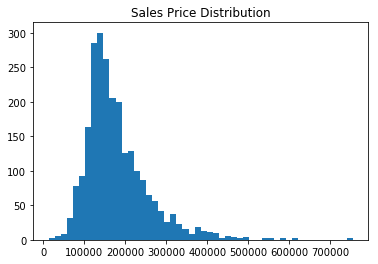

In [10]:
# let's plot the Sale Prices distribution
plt.hist(data_df['SalePrice'], bins = 50)
plt.title('Sales Price Distribution')
plt.show()

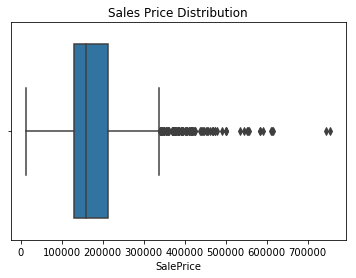

In [14]:
# let's plot the Sale Prices distribution
sns.boxplot(data_df['SalePrice'])
plt.title('Sales Price Distribution')
plt.show()

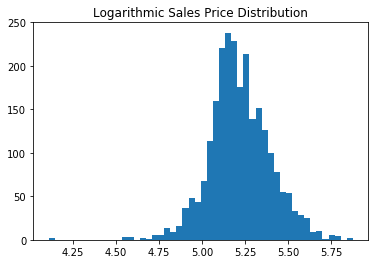

In [83]:
# let's plot the Sale Prices distribution in log
plt.hist(np.log10(data_df['SalePrice']), bins = 50)
plt.title('Logarithmic Sales Price Distribution')
plt.show()

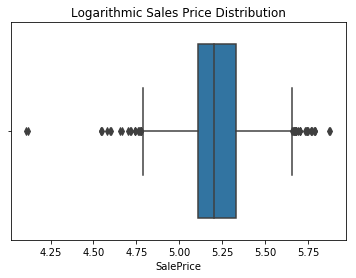

In [84]:
# let's plot the Sale Prices distribution in log
sns.boxplot(np.log10(data_df['SalePrice']))
plt.title('Logarithmic Sales Price Distribution')
plt.show()

### Encode ordinal to grades 1 to 5 ? est-ce utile ?


### One hot encoding

SNS pairplot avec sales price et chque data